In [1]:
import os
import hyperspy.api as hs
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import zarr
from PIL import Image

def absoluteFilePaths(directory:str):
    # Credits: https://stackoverflow.com/questions/9816816/get-absolute-paths-of-all-files-in-a-directory
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            yield os.path.abspath(os.path.join(dirpath, f))


DATA_DIRECTORY = "/cluster/projects/itea_lille-nv-fys/TFY4330_nanotools/Grp11"
ZSPY_FILES_DIRECTORY = "data/zspy"

names_with_magnetism = []

dm3: dict[str, str] = {}
hdr: dict[str, str] = {}
mib: dict[str, str] = {}

for filepath in absoluteFilePaths(DATA_DIRECTORY):
    file = filepath.split("/")[-1].split(".")
    (name, file_extension) = file[0], file[-1]

    if file_extension == "mib":
        mib[name] = filepath
        names_with_magnetism.append(name)
    elif file_extension == "hdr":
        hdr[name] = filepath
    elif file_extension == "dm3":
        dm3[name] = filepath

os.makedirs(ZSPY_FILES_DIRECTORY, exist_ok=True)

name_to_bitmap = {
    "...":"bitmaps/bitmap-size-[200 200 260 260]nm.bmp",
    "...":"bitmaps/bitmap-size-[320 320 380 380]nm.bmp",
    "...":"bitmaps/bitmap-size-[440 440 500 500]nm.bmp",
}

names_with_magnetism.sort()

In [2]:
%matplotlib widget
from pathlib import Path
import os

if "008" in names_with_magnetism:
    names_with_magnetism.remove("008") # Remove magnetic compass

stem_folder = Path("stem-images")

os.makedirs(str(stem_folder), exist_ok=True)

for name in names_with_magnetism:
    s = hs.load(dm3[name])
    fig, ax = plt.subplots()
    cax = ax.imshow(s.data, cmap="gray", vmin=0, vmax=255)

    scale = s.axes_manager[0].scale
    #print(f"name:{name}, scale:{round(scale, 4)}")
    
    fig.savefig(f"stem-images/{name}-stem.png")

name:002, scale:0.0198
name:003, scale:0.0372
name:004, scale:0.0372
name:005, scale:0.0372
name:006, scale:0.0198
name:007, scale:0.0198
name:009, scale:0.0372
name:010, scale:0.0372
name:011, scale:0.0372
name:012, scale:0.0372
name:013, scale:0.0198
name:014, scale:0.0198
name:015, scale:0.0198
name:016, scale:0.0198
name:017, scale:0.0198


In [ ]:
%matplotlib inline

#for name in ["002"]:
name = "002"
s = hs.load(dm3[name])

filepath = Path(ZSPY_FILES_DIRECTORY).joinpath(f"{name}.zspy")
if not filepath.exists():
    s_4d = hs.load(mib[name], lazy=True, navigation_shape=(s.axes_manager[0].size + 1, s.axes_manager[1].size))
    s_4d_crop = s_4d.inav[:-1]

    for i in range(2):
        s_4d_crop.axes_manager[i].scale = s.axes_manager[i].scale
        s_4d_crop.axes_manager[i].unit = s.axes_manager[i].units

    s_4d_crop.axes_manager[0].name = "Probe x"
    s_4d_crop.axes_manager[1].name = "Probe y"
    s_4d_crop.axes_manager[2].name = "Diffraction x"
    s_4d_crop.axes_manager[3].name = "Diffraction y"

    store = zarr.ZipStore(str(filepath))
    s_4d_crop.save(store, chunks=(64,64,64,64))

s_magnetic = hs.load(str(filepath), lazy=True)
s_magnetic_sum = s_magnetic.sum(axis=(-1,-2))
s_magnetic_nav = s_magnetic_sum.transpose
s_magnetic.navigator = s_magnetic_nav

s_magnetic_bs = s_magnetic.get_direct_beam_position(method="center_of_mass")
s_magnetic_bs.compute()
#s_magnetic_bs.plot()

s_magnetic_bs_lp = s_magnetic_bs.get_linear_plane()

s_magnetic_bs_corr = s_magnetic_bs - s_magnetic_bs_lp
#s_magnetic_bs_corr.get_magnitude_phase_signal().plot()

metadata = {}
    #bitmap_mask_filepath = name_to_bitmap[name]
    #bitmap_image = Image.open(bitmap_mask_filepath)
    #bitmap_mask = np.array(bitmap_image)

    #for i in range(2):
    #    s_magnetic[:,:,i] = s_magnetic[:,:,i]*bitmap_mask


Defaulting to user installation because normal site-packages is not writeable


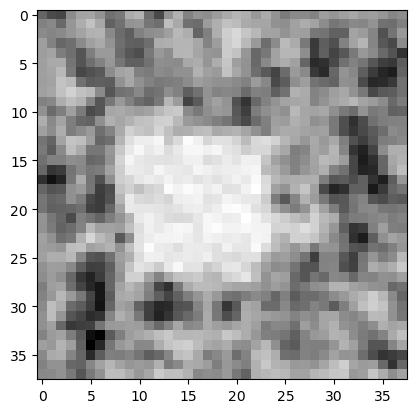

(1444,)


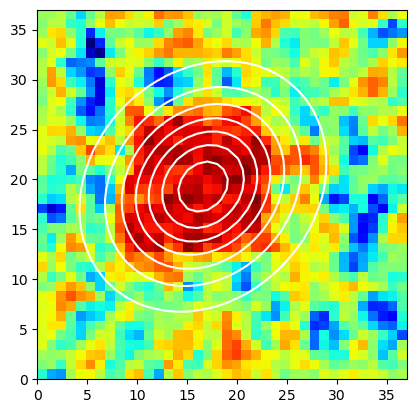

-2.4301200697151835 : 0.3001788544731845


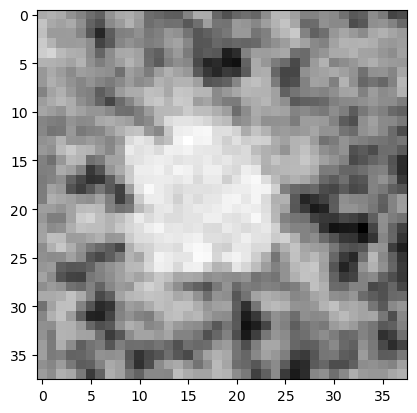

(1444,)


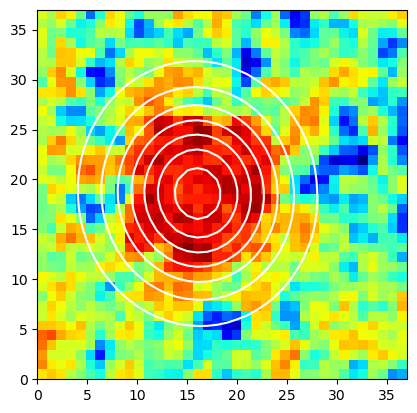

-2.9633619950950454 : -0.4054173947958333


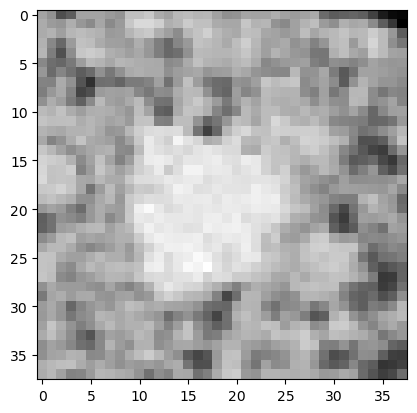

(1444,)


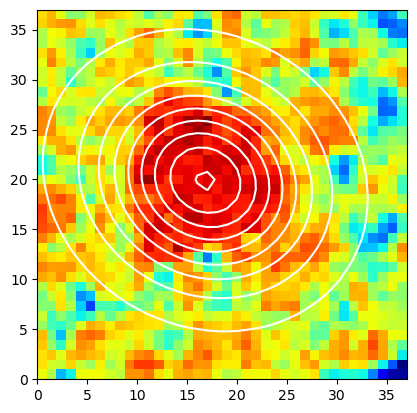

-2.1938932241008295 : 0.9305696621924291


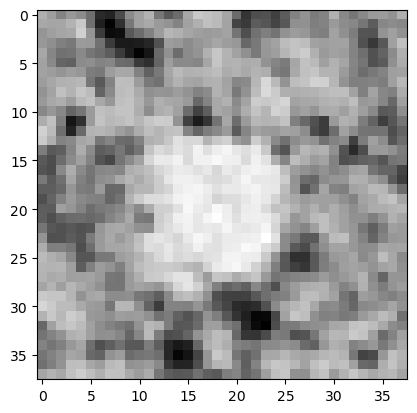

(1444,)


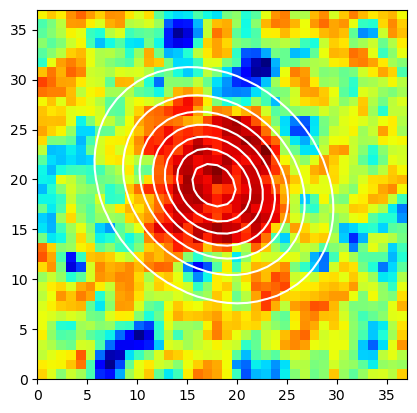

-1.3396797754111347 : 0.4335634105627655


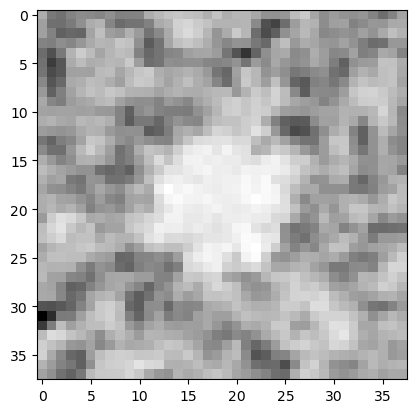

(1444,)


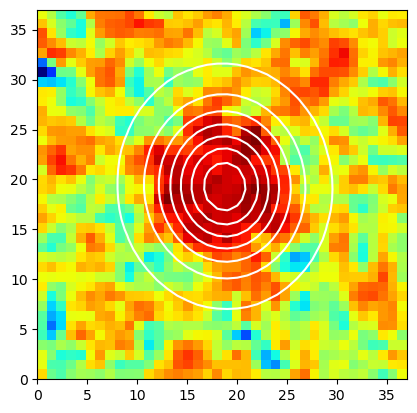

-0.2555859989885825 : 0.3054280261858331


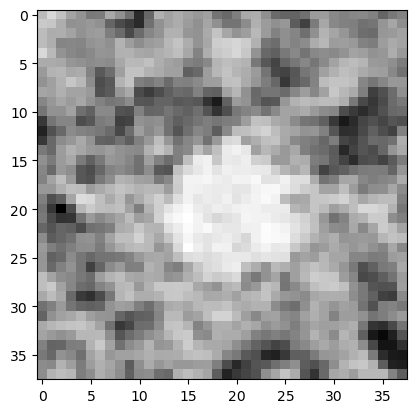

(1444,)


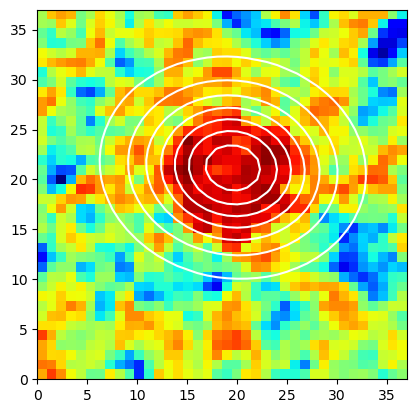

0.5597127906525792 : 2.179144366709604


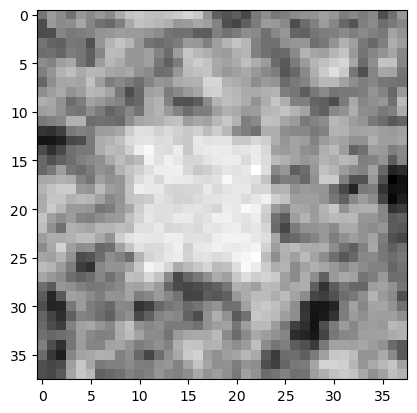

(1444,)


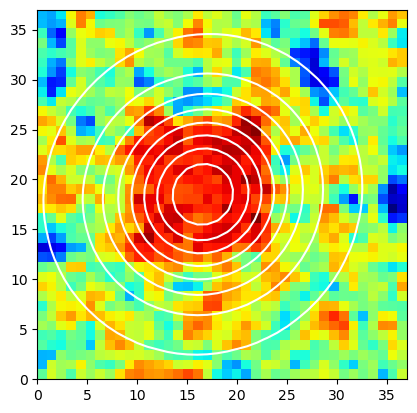

-2.443872173542079 : -0.4861071558986261


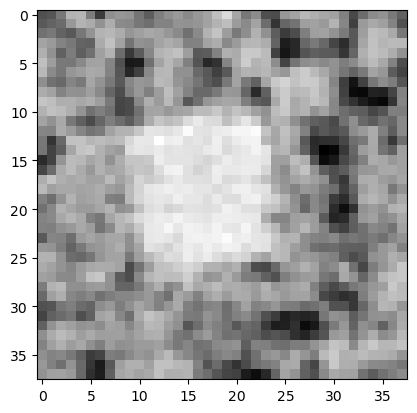

(1444,)


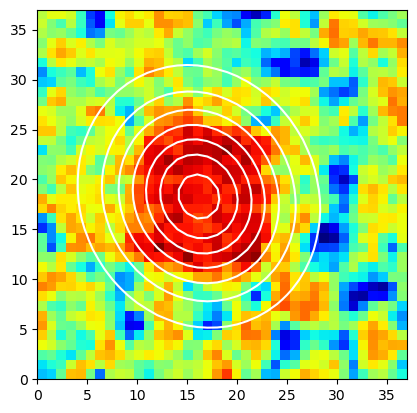

-2.847186193801054 : -0.6943066029322544


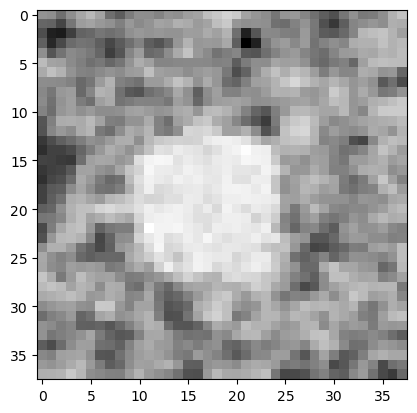

(1444,)


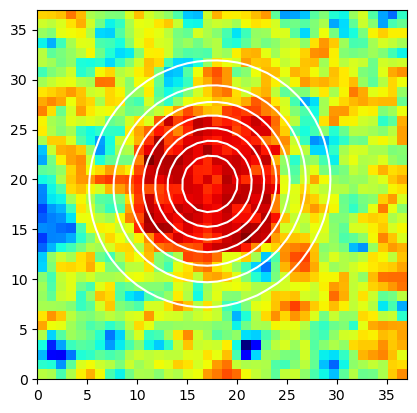

-1.7590701358740972 : 0.5695990257789596


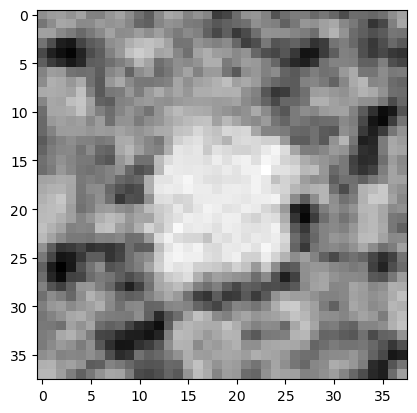

(1444,)


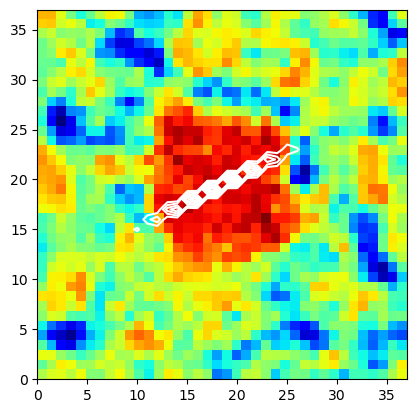

-0.9025363630858578 : 0.29843287409494224


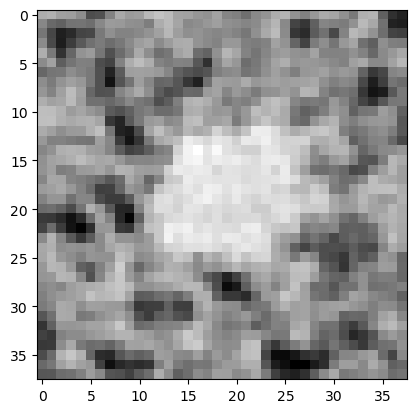

(1444,)


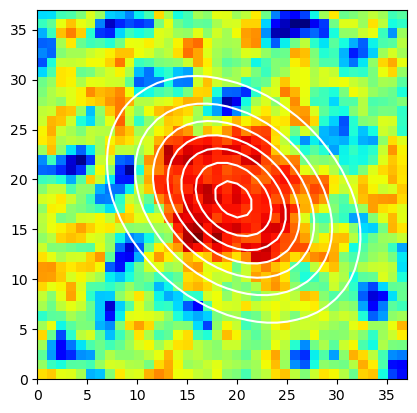

0.6299549884943865 : -0.9905957367913345


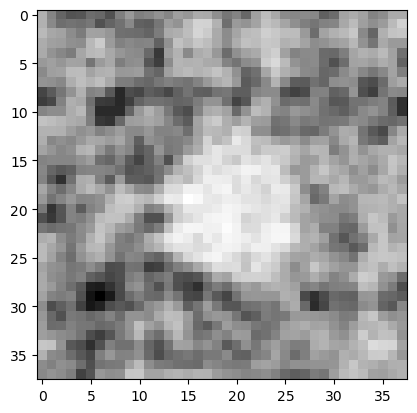

(1444,)


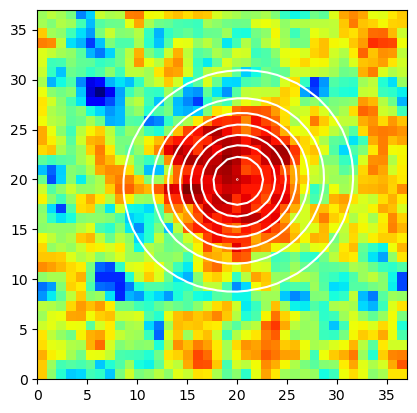

1.1004751303195093 : 0.8633387292857293


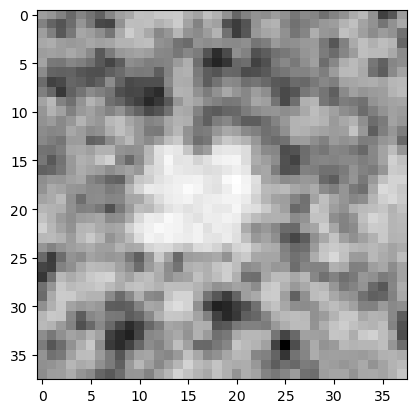

(1444,)


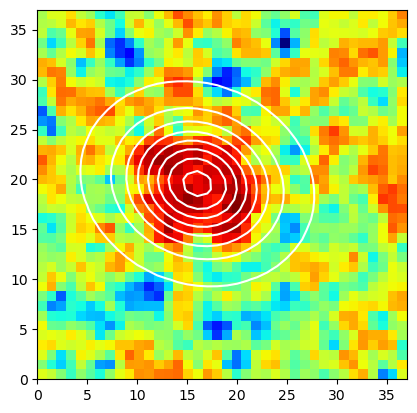

-2.996091854832681 : 0.5765308728967575


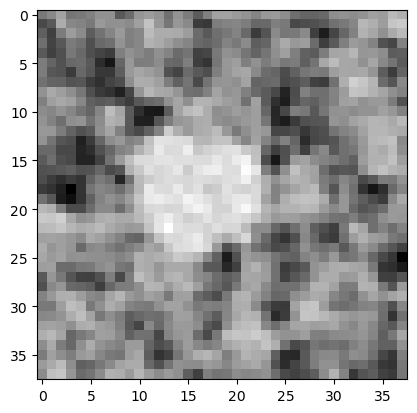

(1444,)


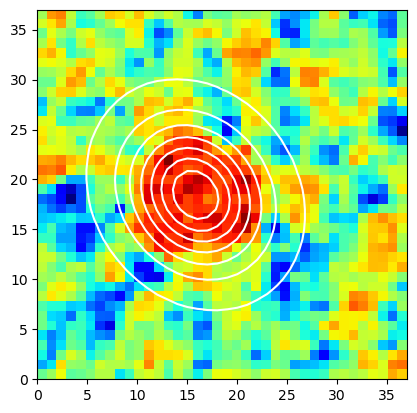

-3.176396420015127 : -0.5281622094947807


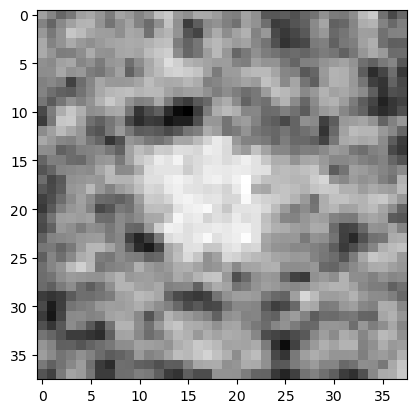

(1444,)


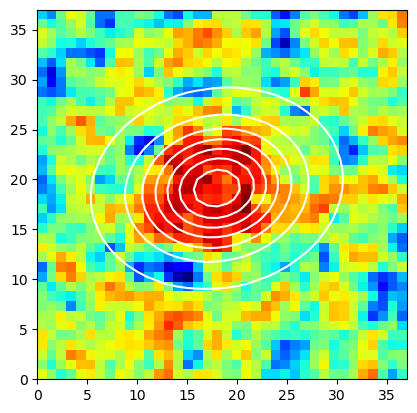

-1.0468325734625488 : 0.12276620371920188


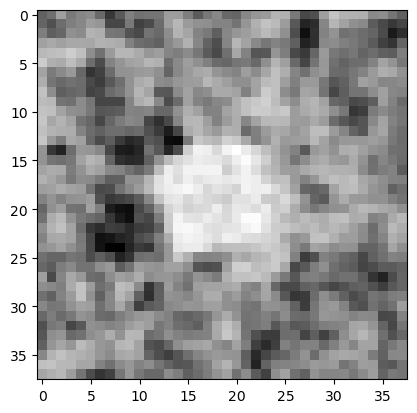

(1444,)


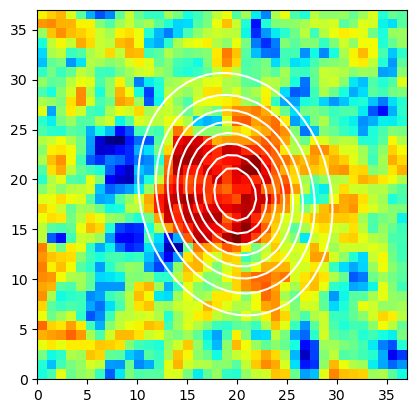

0.794793081511088 : -0.47264546830350085


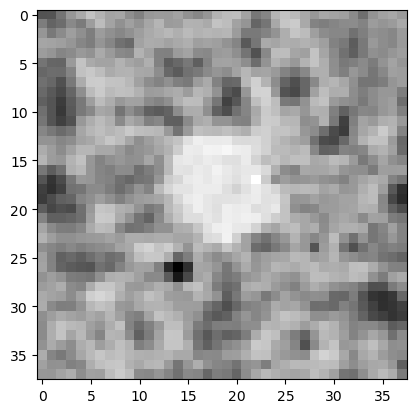

(1444,)


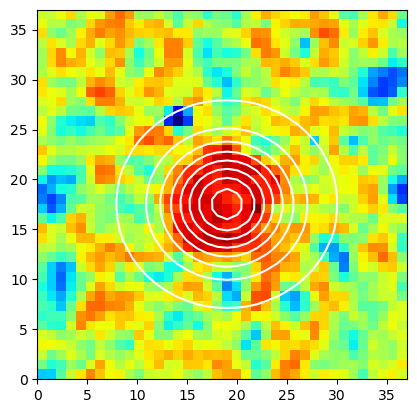

-0.042831424583805955 : -1.4626473241917992


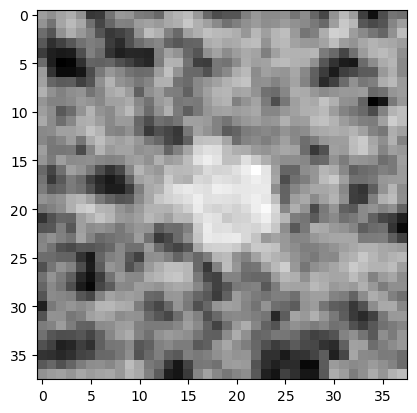

(1444,)


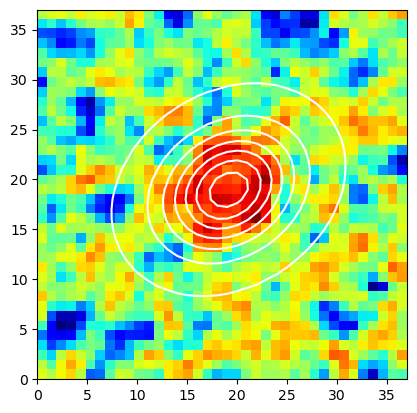

0.13568077396766398 : -0.01911666894594788


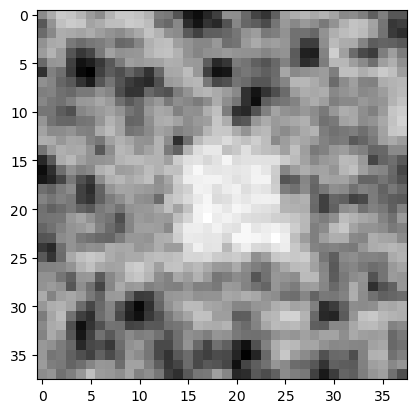

(1444,)


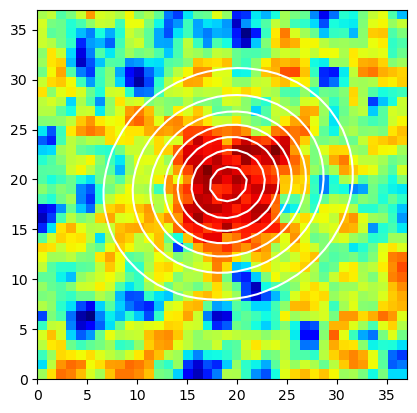

0.08676931509068098 : 0.554163862462218


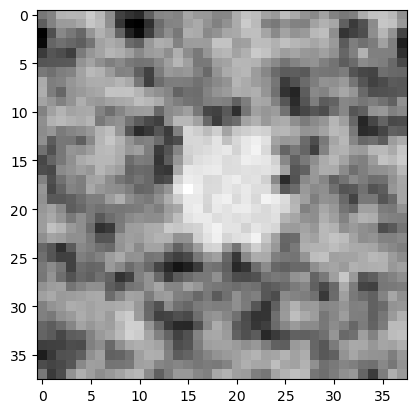

(1444,)


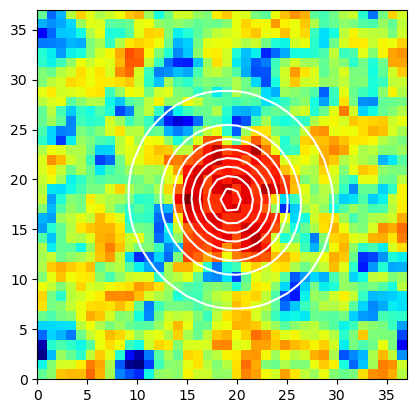

0.34610001042821636 : -1.0356043983858925


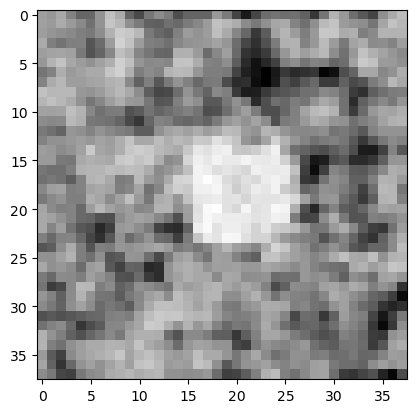

(1444,)


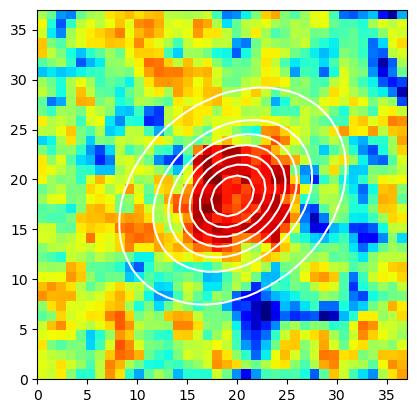

0.5301425128358694 : -0.6407386517068439


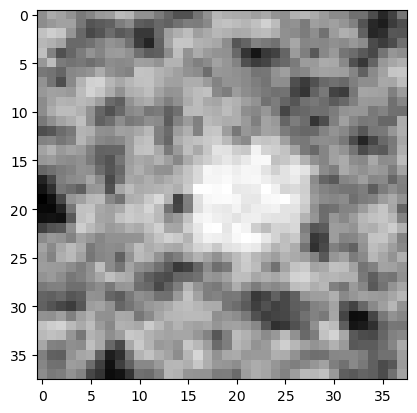

(1444,)


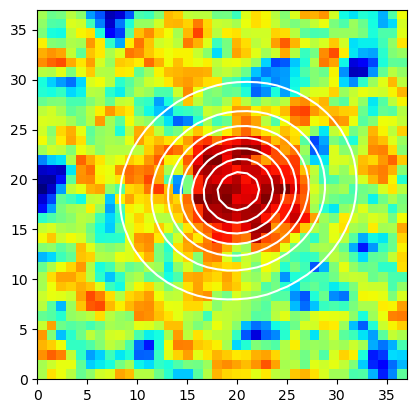

1.1109742142445604 : -0.13890100531900984


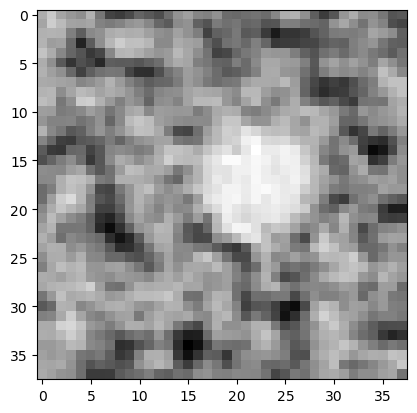

(1444,)


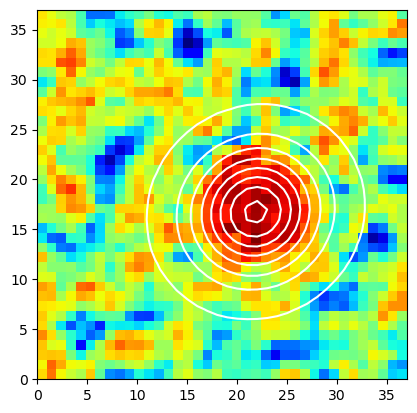

2.8381054314476444 : -2.2439055318585055


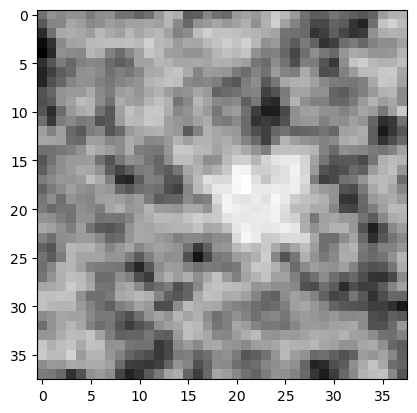

(1444,)


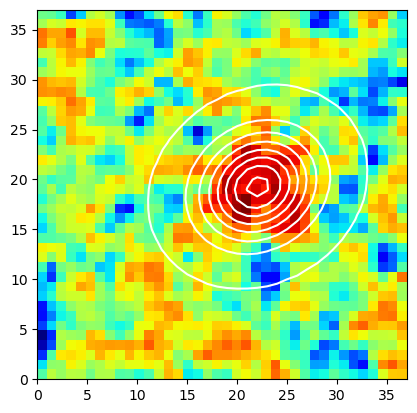

3.0586059218085957 : 0.26058101685351787
24



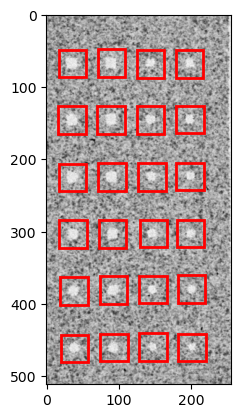

In [21]:
import numpy as np
import hyperspy.api as hs
from scipy.optimize import curve_fit
s = hs.load(dm3["005"])


def find_center_of_mass(array):
    total_y = 0
    total_x = 0

    c = 2**5
    
    normalisation = np.sum(array/c)

    for y in range(array.shape[0]):
        for x in range(array.shape[1]):
            total_x += x*c*(array[y,x]/normalisation)
            total_y += y*c*(array[y,x]/normalisation)
            
    return np.array([round(total_x), round(total_y)])


from scipy.ndimage import gaussian_filter

data = gaussian_filter(s.data, sigma=7)
max_value = np.max(data)

threshold = 0.89*max_value
data[data < threshold] = 0
data[data >= threshold] = max_value

border = 12
data[0:border, :] = 0
data[-border:-1, :] = 0
data[:, 0:border] = 0
data[:, -border:-1] = 0


def find_peaks(signal, limit=(1/3)):
    threshold = (np.max(signal))*limit
    peaks = []
    x0 = None

    
    for x in np.arange(signal.shape[0]):
        if (signal[x]) > threshold and x0==None:
            x0 = x

        if (signal[x]) < threshold and x0!=None:
            peaks.append(round((x+x0)/2))
            x0 = None
    return peaks

signal_x = np.sum(data, axis=0)
signal_y = np.sum(data, axis=1)

peaks_x = find_peaks(signal_x)
peaks_y = find_peaks(signal_y)

subfigure_half_width = int(38/2)

positions = []

# Credit: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-mas
def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()


def fit_gaussian(data):
    # Create x and y indices
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    
    #create data
    initial_data = twoD_Gaussian((x, y), 3,int(data.shape[1]/2),int(data.shape[0]/2),10,10,0,10)
    
    # plot twoD_Gaussian data generated above
    #plt.figure()
    #plt.imshow(initial_data.reshape(data.shape[1]+1, data.shape[0]+1))
    #plt.colorbar()

    # add some noise to the data and try to fit the data generated beforehand
    initial_guess = (1,int(data.shape[1]/2),int(data.shape[0]/2),10,10,0,10)

    flatten_data = data.flatten()
    
    #data_noisy = initial_data + 0.2*np.random.normal(size=initial_data.shape)

    print(initial_data.shape)
    
    popt, pcov = curve_fit(twoD_Gaussian, (x, y), flatten_data, p0=initial_guess)

    data_fitted = twoD_Gaussian((x, y), *popt)
    
    fig, ax = plt.subplots(1, 1)
    #ax.hold(True) For older versions. This has now been deprecated and later removed
    ax.imshow(flatten_data.reshape(data.shape[1], data.shape[0]), cmap=plt.cm.jet, origin='lower',
        extent=(x.min(), x.max(), y.min(), y.max()))
    ax.contour(x, y, data_fitted.reshape(data.shape[1], data.shape[0]), 8, colors='w')
    plt.show()

    return (popt[1]-data.shape[1]/2, popt[2]-data.shape[0]/2)





for x in peaks_x:
    for y in peaks_y:
        data_cutout = s.data[y-subfigure_half_width:y+subfigure_half_width, x-subfigure_half_width:x+subfigure_half_width]
        data_cutout_norm = np.sum(data_cutout)
        
        plt.imshow(data_cutout, cmap='gray')
        plt.show()

        dx,dy = fit_gaussian(data_cutout/data_cutout_norm)

        print(dx, ":", dy)
        
        positions.append((x+dx,y+dy))

fig, ax = plt.subplots()
ax.imshow(s.data, cmap='gray')

import matplotlib.patches as patches

print(len(positions))

width = 38
for (x,y) in positions:
    square = patches.Rectangle((x-int(width/2), y-int(width/2)), width, width, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(square)


fig.show()
print()

In [ ]:
for x_index in range(4):
    for y_index in range(6):
        name = "002"

        offset_x = 
        
        data_slice = s.data[

In [ ]:
import pyxem as pxm

fig, ax = plt.subplots()

pxm.utils.plotting.plot_beam_shift_color(s_magnetic_bs_corr, ax=ax)
fig.savefig("002-magnetic-plot.png")

Navigation axis name,size,index,offset,scale,units
Probe x,256,0,0.0,0.019841250032186508,
Probe y,512,0,0.0,0.019841250032186508,
Signal axis name,size,,offset,scale,units
Diffraction x,256,,0.0,1.0,
Diffraction y,64,,0.0,1.0,


Signal axis name,size,,offset,scale,units
x,256,,-0.0,0.019841250032186508,µm
y,512,,-0.0,0.019841250032186508,µm


['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017']


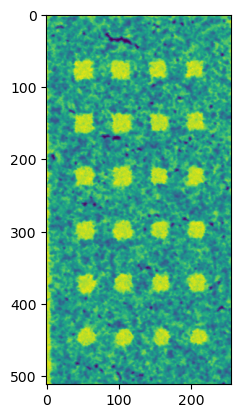

In [17]:
display(s_magnetic.axes_manager)
display(s.axes_manager)

fig, ax = plt.subplots()
ax.imshow(s.data)
fig.show()
fig.savefig("002-stem.png")
names_with_magnetism.sort()
print(names_with_magnetism)

(512, 256, 2)


IndexError: index 2 is out of bounds for axis 2 with size 2

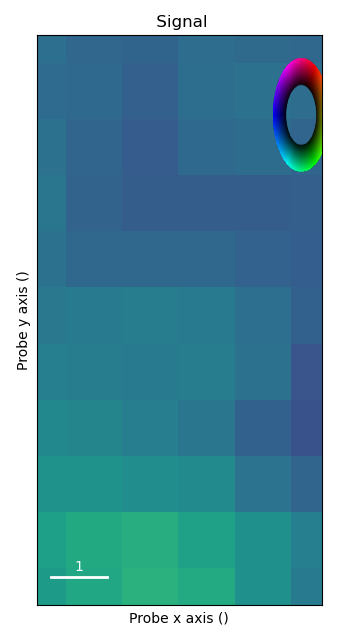